In [66]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [67]:
clause_list = [[0,1],
               [2,3],
               [0,2],
               [1,3]
               ]

# list of clauses for the sudoku 2x2 game
# clauses or rules are 1) No column may contain the same value twice
#                      2) No row may contain the same value twice

# |v0|v1|
# |v2|v3| 

# In clause_list we declare 4 clauses or constraints, the first two for the rows and the last two for the cols

In [68]:
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

In [69]:
# We will use separate registers to name the bits
in_qubits = QuantumRegister(2, name='input')
out_qubit = QuantumRegister(1, name='output')
qc = QuantumCircuit(in_qubits, out_qubit)
#qc.x(1)

XOR(qc, in_qubits[0], in_qubits[1], out_qubit)
qc.draw()

input_0: ──■───────
           │       
input_1: ──┼────■──
         ┌─┴─┐┌─┴─┐
 output: ┤ X ├┤ X ├
         └───┘└───┘

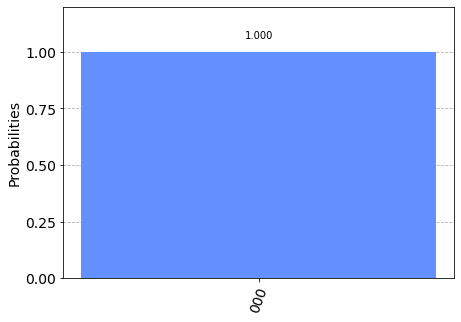

In [70]:
qc.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [71]:
# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')  # variable bits
clause_qubits = QuantumRegister(4, name='c')  # bits to store clause-checks

# Create quantum circuit
qc = QuantumCircuit(var_qubits, clause_qubits)

# Use XOR gate to check each clause
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

qc.draw()

v_0: ──■───────────────────■─────────────────
       │                   │                 
v_1: ──┼─────────■─────────┼─────────■───────
       │         │         │         │       
v_2: ──┼────■────┼─────────┼────■────┼───────
       │    │    │         │    │    │       
v_3: ──┼────┼────┼────■────┼────┼────┼────■──
     ┌─┴─┐  │  ┌─┴─┐  │    │    │    │    │  
c_0: ┤ X ├──┼──┤ X ├──┼────┼────┼────┼────┼──
     └───┘┌─┴─┐└───┘┌─┴─┐  │    │    │    │  
c_1: ─────┤ X ├─────┤ X ├──┼────┼────┼────┼──
          └───┘     └───┘┌─┴─┐┌─┴─┐  │    │  
c_2: ────────────────────┤ X ├┤ X ├──┼────┼──
                         └───┘└───┘┌─┴─┐┌─┴─┐
c_3: ──────────────────────────────┤ X ├┤ X ├
                                   └───┘└───┘

In [72]:
# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit)

# Compute clauses
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

# Flip 'output' bit if all clauses are satisfied
qc.mct(clause_qubits, output_qubit)

qc.draw()

v_0: ──■───────────────────■──────────────────────
       │                   │                      
v_1: ──┼─────────■─────────┼─────────■────────────
       │         │         │         │            
v_2: ──┼────■────┼─────────┼────■────┼────────────
       │    │    │         │    │    │            
v_3: ──┼────┼────┼────■────┼────┼────┼────■───────
     ┌─┴─┐  │  ┌─┴─┐  │    │    │    │    │       
c_0: ┤ X ├──┼──┤ X ├──┼────┼────┼────┼────┼────■──
     └───┘┌─┴─┐└───┘┌─┴─┐  │    │    │    │    │  
c_1: ─────┤ X ├─────┤ X ├──┼────┼────┼────┼────■──
          └───┘     └───┘┌─┴─┐┌─┴─┐  │    │    │  
c_2: ────────────────────┤ X ├┤ X ├──┼────┼────■──
                         └───┘└───┘┌─┴─┐┌─┴─┐  │  
c_3: ──────────────────────────────┤ X ├┤ X ├──■──
                                   └───┘└───┘┌─┴─┐
out: ────────────────────────────────────────┤ X ├
                                             └───┘

In [73]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

sudoku_oracle(qc, clause_list, clause_qubits)
qc.draw()

»
    v_0: ──■───────────────────■────────────────────────■───────────────────■──»
           │                   │                        │                   │  »
    v_1: ──┼─────────■─────────┼─────────■──────────────┼─────────■─────────┼──»
           │         │         │         │              │         │         │  »
    v_2: ──┼────■────┼─────────┼────■────┼──────────────┼────■────┼─────────┼──»
           │    │    │         │    │    │              │    │    │         │  »
    v_3: ──┼────┼────┼────■────┼────┼────┼────■─────────┼────┼────┼────■────┼──»
         ┌─┴─┐  │  ┌─┴─┐  │    │    │    │    │       ┌─┴─┐  │  ┌─┴─┐  │    │  »
    c_0: ┤ X ├──┼──┤ X ├──┼────┼────┼────┼────┼────■──┤ X ├──┼──┤ X ├──┼────┼──»
         └───┘┌─┴─┐└───┘┌─┴─┐  │    │    │    │    │  └───┘┌─┴─┐└───┘┌─┴─┐  │  »
    c_1: ─────┤ X ├─────┤ X ├──┼────┼────┼────┼────■───────┤ X ├─────┤ X ├──┼──»
              └───┘     └───┘┌─┴─┐┌─┴─┐  │    │    │       └───┘     └───┘┌─┴─┐»
    c_2: ────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├»
                             └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘»
    c_3: ──────────────────────────────┤ X ├┤ X ├──■───────────────────────────»
                                       └───┘└───┘┌─┴─┐                         »
    out: ────────────────────────────────────────┤ X ├─────────────────────────»
                                                 └───┘                         »
cbits: 4/══════════════════════════════════════════════════════════════════════»
                                                                               »
«                        
«    v_0: ───────────────
«                        
«    v_1: ───────■───────
«                │       
«    v_2: ──■────┼───────
«           │    │       
«    v_3: ──┼────┼────■──
«           │    │    │  
«    c_0: ──┼────┼────┼──
«           │    │    │  
«    c_1: ──┼────┼────┼──
«         ┌─┴─┐  │    │  
«    c_2: ┤ X ├──┼────┼──
«         └───┘┌─┴─┐┌─┴─┐
«    c_3: ─────┤ X ├┤ X ├
«              └───┘└───┘
«    out: ───────────────
«                        
«cbits: 4/═══════════════
«

In [74]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U_s"
    return U_s

In [77]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

num_layers = 2

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

for j in range(num_layers):

    ## First Iteration
    # Apply our oracle
    sudoku_oracle(qc, clause_list, clause_qubits)
    qc.barrier()  # for visual separation
    # Apply our diffuser
    qc.append(diffuser(4), [0,1,2,3])
    qc.barrier()

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw(fold=-1)

┌───┐               ░                                                                                       ░ ┌──────┐ ░                                                                                       ░ ┌──────┐ ░ ┌─┐         
    v_0: ─────────────┤ H ├───────────────░───■───────────────────■────────────────────────■───────────────────■──────────────────░─┤0     ├─░───■───────────────────■────────────────────────■───────────────────■──────────────────░─┤0     ├─░─┤M├─────────
                      ├───┤               ░   │                   │                        │                   │                  ░ │      │ ░   │                   │                        │                   │                  ░ │      │ ░ └╥┘┌─┐      
    v_1: ─────────────┤ H ├───────────────░───┼─────────■─────────┼─────────■──────────────┼─────────■─────────┼─────────■────────░─┤1     ├─░───┼─────────■─────────┼─────────■──────────────┼─────────■─────────┼─────────■────────░─┤1     ├─░──╫─┤M├──────
                      ├───┤               ░   │         │         │         │              │         │         │         │        ░ │  U_s │ ░   │         │         │         │              │         │         │         │        ░ │  U_s │ ░  ║ └╥┘┌─┐   
    v_2: ─────────────┤ H ├───────────────░───┼────■────┼─────────┼────■────┼──────────────┼────■────┼─────────┼────■────┼────────░─┤2     ├─░───┼────■────┼─────────┼────■────┼──────────────┼────■────┼─────────┼────■────┼────────░─┤2     ├─░──╫──╫─┤M├───
                      ├───┤               ░   │    │    │         │    │    │              │    │    │         │    │    │        ░ │      │ ░   │    │    │         │    │    │              │    │    │         │    │    │        ░ │      │ ░  ║  ║ └╥┘┌─┐
    v_3: ─────────────┤ H ├───────────────░───┼────┼────┼────■────┼────┼────┼────■─────────┼────┼────┼────■────┼────┼────┼────■───░─┤3     ├─░───┼────┼────┼────■────┼────┼────┼────■─────────┼────┼────┼────■────┼────┼────┼────■───░─┤3     ├─░──╫──╫──╫─┤M├
                      └───┘               ░ ┌─┴─┐  │  ┌─┴─┐  │    │    │    │    │       ┌─┴─┐  │  ┌─┴─┐  │    │    │    │    │   ░ └──────┘ ░ ┌─┴─┐  │  ┌─┴─┐  │    │    │    │    │       ┌─┴─┐  │  ┌─┴─┐  │    │    │    │    │   ░ └──────┘ ░  ║  ║  ║ └╥┘
    c_0: ─────────────────────────────────░─┤ X ├──┼──┤ X ├──┼────┼────┼────┼────┼────■──┤ X ├──┼──┤ X ├──┼────┼────┼────┼────┼───░──────────░─┤ X ├──┼──┤ X ├──┼────┼────┼────┼────┼────■──┤ X ├──┼──┤ X ├──┼────┼────┼────┼────┼───░──────────░──╫──╫──╫──╫─
                                          ░ └───┘┌─┴─┐└───┘┌─┴─┐  │    │    │    │    │  └───┘┌─┴─┐└───┘┌─┴─┐  │    │    │    │   ░          ░ └───┘┌─┴─┐└───┘┌─┴─┐  │    │    │    │    │  └───┘┌─┴─┐└───┘┌─┴─┐  │    │    │    │   ░          ░  ║  ║  ║  ║ 
    c_1: ─────────────────────────────────░──────┤ X ├─────┤ X ├──┼────┼────┼────┼────■───────┤ X ├─────┤ X ├──┼────┼────┼────┼───░──────────░──────┤ X ├─────┤ X ├──┼────┼────┼────┼────■───────┤ X ├─────┤ X ├──┼────┼────┼────┼───░──────────░──╫──╫──╫──╫─
                                          ░      └───┘     └───┘┌─┴─┐┌─┴─┐  │    │    │       └───┘     └───┘┌─┴─┐┌─┴─┐  │    │   ░          ░      └───┘     └───┘┌─┴─┐┌─┴─┐  │    │    │       └───┘     └───┘┌─┴─┐┌─┴─┐  │    │   ░          ░  ║  ║  ║  ║ 
    c_2: ─────────────────────────────────░─────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼───░──────────░─────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼───░──────────░──╫──╫──╫──╫─
                                          ░                     └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐ ░          ░                     └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐ ░          ░  ║  ║  ║  ║ 
    c_3: ─────────────────────────────────░───────────────────────────────┤ X ├┤ X ├──■────────────────────────────────┤ X ├┤ X ├─░──────────░───────────────────────────────┤ X ├┤ X ├──■───────────

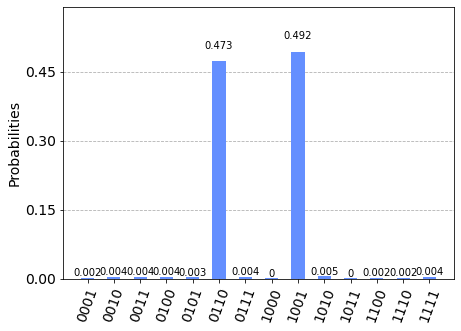

In [76]:
# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
qobj = assemble(transpiled_qc)
result = aer_sim.run(qobj).result()
plot_histogram(result.get_counts())